<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

data = pd.read_csv(URL1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

X = pd.read_csv(URL2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

we can see we only have 18 test samples.


In [11]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
logreg_cv = GridSearchCV(lr, parameters, scoring='accuracy')

# Fit the model
logreg_cv.fit(X_train, Y_train)

# Then, you can correctly access the best parameters and best score like this:
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8342857142857143


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
accuracy_logreg = logreg_cv.score(X_test, Y_test)
print("Test set accuracy: ", accuracy_logreg)

Test set accuracy:  0.8333333333333334


Lets look at the confusion matrix:


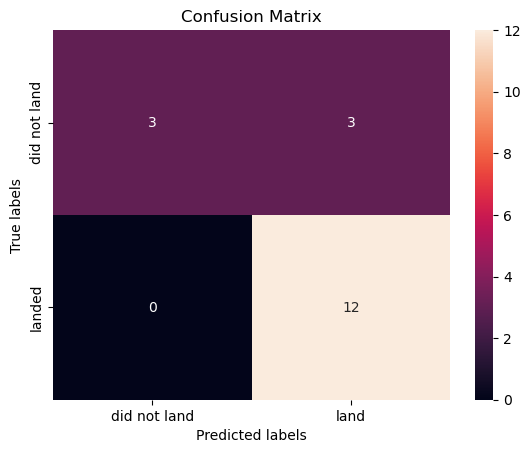

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


In [17]:
# Print Logistic Regression Classification Report
logreg_report = classification_report(Y_test, yhat, target_names=['Class 0', 'Class 1'])

print(logreg_report)

              precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67         6
     Class 1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Assuming you have your training data in X_train and y_train
# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
# SVM Best Params and Accuracy Score
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
accuracy_svm = svm_cv.score(X_test, Y_test)

print("Test set accuracy: ", accuracy_svm)

Test set accuracy:  0.8333333333333334


We can plot the confusion matrix


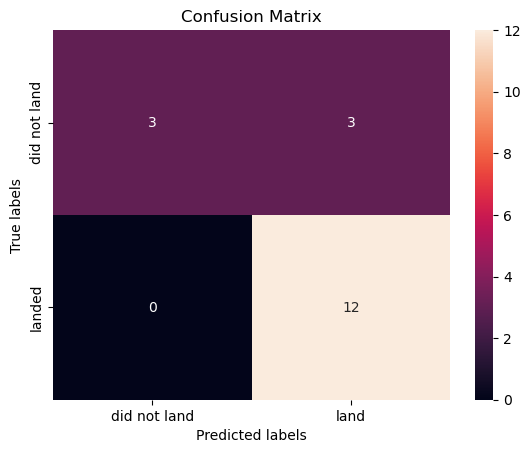

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [23]:
# Print SVM Classification Report
svm_report = classification_report(Y_test, yhat, target_names=['Class 0', 'Class 1'])
print(svm_report)

              precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67         6
     Class 1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2'], 
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)

In [25]:
# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Assuming you have your training data in X_train and y_train
# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [26]:
# Decision Tree
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [27]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Test set accuracy: ", accuracy_tree)

Test set accuracy:  0.9444444444444444


We can plot the confusion matrix


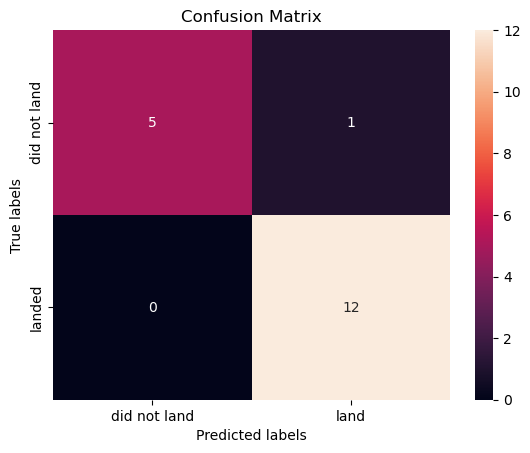

In [28]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [29]:
# Print Decision Tree Classification Report
tree_report = classification_report(Y_test, yhat, target_names=['Class 0', 'Class 1'])
print(tree_report)

              precision    recall  f1-score   support

     Class 0       1.00      0.83      0.91         6
     Class 1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [31]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [32]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [33]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Test set accuracy: ", accuracy_knn)

Test set accuracy:  0.8333333333333334


We can plot the confusion matrix


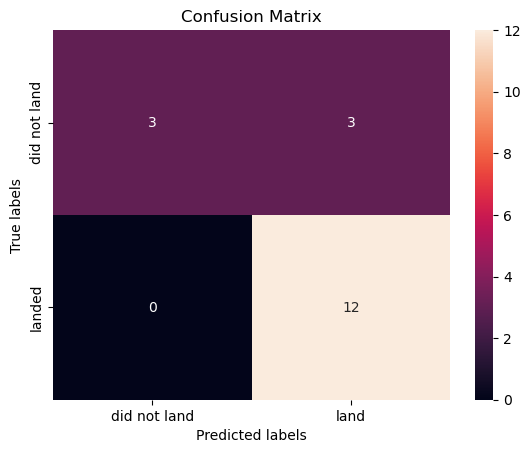

In [34]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [35]:
# Print KNN Classification Report
knn_report = classification_report(Y_test, yhat, target_names=['Class 0', 'Class 1'])
print(knn_report)

              precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67         6
     Class 1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



## TASK  12


Find the method performs best:


In [36]:
print('Classification Reports')
print('Logistic Regression: \n', logreg_report)
print('SVM: \n', svm_report)
print('Decision Tree: \n', tree_report)
print('KNN: \n', knn_report)

Classification Reports
Logistic Regression: 
               precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67         6
     Class 1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

SVM: 
               precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67         6
     Class 1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Decision Tree: 
               precision    recall  f1-score   support

     Class 0       1.00      0.83      0.91         6
     Class 1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weig

Based on the metrics of each model, the `Decision Tree` has the most accurate outputs, with an accuracy of appoiximately 94%.

Accuracy Ranked:
- Decision Tree: 94%
- Logistic Regression: 83%
- SVM: 83%
- KNN: 83%

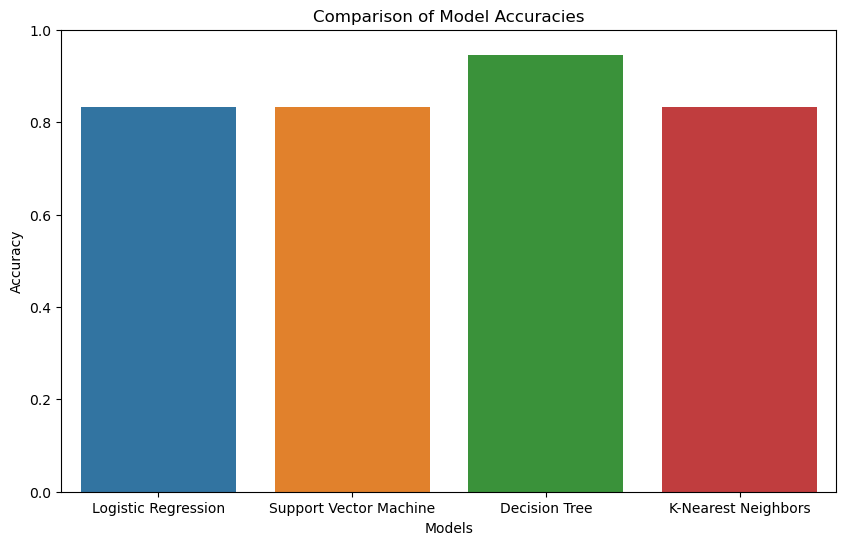

In [47]:
model_accuracies = {
    'Logistic Regression': accuracy_logreg,
    'Support Vector Machine': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'K-Nearest Neighbors': accuracy_knn
}

# Convert the dictionary into a Pandas DataFrame for easier plotting with Seaborn
df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Creating the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df)

plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Display the bar chart
plt.show()

## Visualize Decision Tree Outcomes

In [38]:
# Prepare data for visualizing the predictions.
# Run the model on a copy of the wide dataset (X)
# Calculate Preditions and Probabilities
# Generate predictions
predictions = tree_cv.predict(X)

# Generate probabilities for the positive class
probabilities = tree_cv.predict_proba(X)[:, 1]

flight_numbers = data['FlightNumber'].values 

# Create a DataFrame for predictions and probabilities with FlightNumber
predictions_df = pd.DataFrame({
    'FlightNumber': flight_numbers,
    'Prediction': predictions,
    'Probability': probabilities
})

In [39]:
# Merge the predictions back into the original data DataFrame
tree_df = pd.merge(data, predictions_df, on='FlightNumber', how='left')


In [40]:
tree_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Prediction,Probability
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,0.285714
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,0.285714
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,0.285714
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,0.285714
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,0.285714


In [41]:
#tree_df['Orbit'].value_counts()
tree_df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

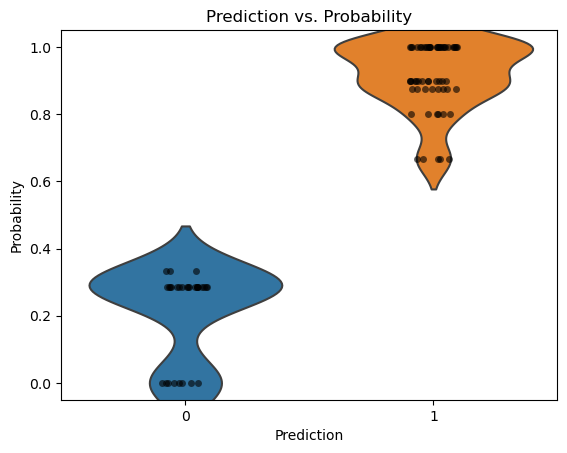

In [42]:
# Violin plot of probabilities for each prediction category
sns.violinplot(x='Prediction', y='Probability', data=tree_df, inner=None)
sns.stripplot(x='Prediction', y='Probability', data=tree_df, jitter=True, color='k', alpha=0.6)
plt.title('Prediction vs. Probability')
plt.show()

#### Notes:
The violin plot demonstrates that when the model predicts a successful landing (Prediction 1), it does so with high confidence, as evidenced by a dense concentration of data points at probability levels around 80% and higher. The shape of the violin indicates that most of these predictions are clustered near the probability of 1, which suggests a strong certainty in these outcomes.

Conversely, for predictions of unsuccessful landings (Prediction 0), the model's probabilities are concentrated around 30%, with the bulk of these predictions being closer to 0. This again shows a high level of confidence in these predictions, albeit the confidence is in the negative outcome.

The "confidence" in this context refers to the model's assigned probability to its predictions, with probabilities closer to 1 or 0 indicating stronger confidence in the respective predicted outcomes.

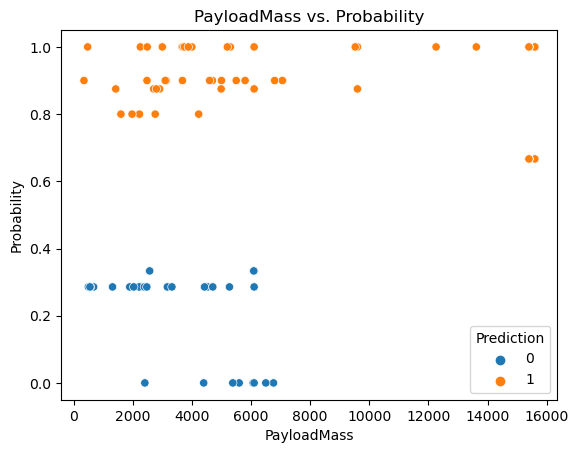

In [43]:
sns.scatterplot(x='PayloadMass', y='Probability', hue='Prediction', data=tree_df)
plt.title('PayloadMass vs. Probability')
plt.show()

#### Notes:
The scatter plot exploring the relationship between payload mass and the probability of a successful landing reveals a nuanced pattern. While heavier payloads uniformly correlate with a high probability of successful landings, indicating consistent model confidence across all launches with higher masses, the data for lighter payloads present a more varied picture. Within this lower mass range, there is a blend of both successful and unsuccessful predicted outcomes, with a tendency towards predicting success. Notably, the instances of predicted failures are predominantly situated at the lower end of the mass spectrum. This pattern could suggest that during the initial phases of the Falcon 9 launches, SpaceX was still refining their landing techniques, which is reflected in the model's predictions of a greater likelihood of unsuccessful landings for these early, lighter payloads. Over time, as expertise and technology advanced, the model's predictions shift towards anticipating success, regardless of the payload mass, which could be indicative of improved reliability and a maturation of SpaceX's landing capabilities.

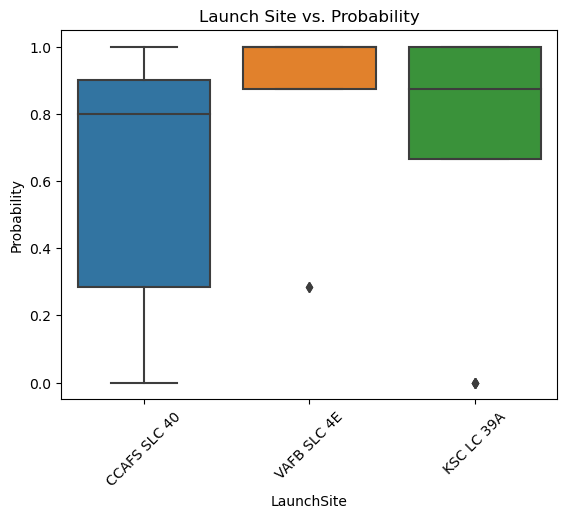

In [44]:
sns.boxplot(x='LaunchSite', y='Probability', data=tree_df)
plt.xticks(rotation=45)
plt.title('Launch Site vs. Probability')
plt.show()

#### Notes:
The box and whisker plot illustrates a comparative analysis of the model's predicted probabilities for successful landings at various launch sites. VAFB SLC 4E stands out with a notably higher median probability, suggesting that, according to the model, this site has a more consistent track record of successful landings. The data points for VAFB SLC 4E are tightly clustered, indicating less variation in launch outcomes and a strong model confidence in successful landings.

In contrast, CCAFS SLC 40 and KSC LC 39A exhibit a wider interquartile range, implying a greater variability in the model's predictions for these sites. Despite this variability, both sites display median probabilities exceeding 80%, denoting that the model generally predicts successful landings more often than not. This high median probability is indicative of a solid success rate, although the broader spread of data points suggests that there are still a number of launches for which the model reserves judgment or predicts a lower chance of success. Overall, the model's predictions mirror an optimistic outlook for landing success at these sites, with a recognition of the inherent complexities and varying confidence levels associated with individual launches.

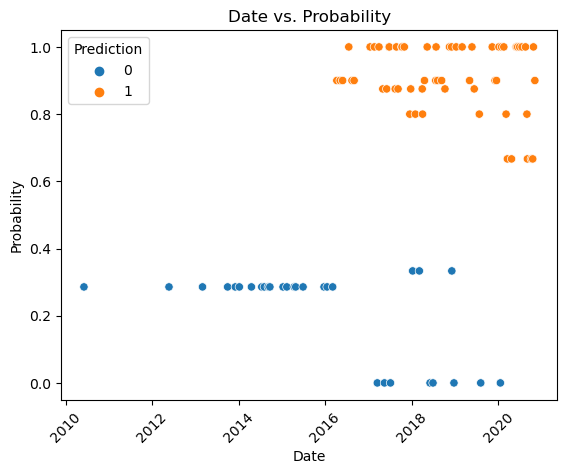

In [45]:
tree_df['Date'] = pd.to_datetime(tree_df['Date'])
sns.scatterplot(x='Date', y='Probability', hue='Prediction', data=tree_df)
plt.xticks(rotation=45)
plt.title('Date vs. Probability')
plt.show()

#### Notes: 
The Date vs. Probability scatter plot reveals a distinct temporal trend that mirrors SpaceX's iterative technological advancements and growing expertise in rocket landings. During the initial years, the pioneering phase is highlighted by a notable frequency of lower success probabilities, mirroring the model's interpretation of this early, developmental stage. These formative launches represented experimental ventures, each contributing incrementally to SpaceX's repository of knowledge and operational experience.

A critical transformation becomes apparent post-2016, as depicted by a marked increase in the model's confidence, with the probabilities of successful landings aggregating towards the upper echelon. This shift signifies SpaceX's maturation, likely driven by cumulative enhancements in technology and refined operational methods that evolved from the foundational years. The density of higher probability data points in the latter years corroborates a period of operational consolidation and reliability, as projected by the model's increasingly positive forecasts.

**Synthesizing Insights Across Visualizations:**  
The concentration of lower landing success probabilities around 30%, as unveiled in the violin plot, gains further context from the Date vs. Probability scatter plot. The initial operations by SpaceX are characterized by a predominance of lower probabilities, aligning with the cluster of unsuccessful outcomes in the violin plot. This convergence suggests that the model's lower confidence in landing success is a reflection of the initial hurdles and SpaceX's ascending learning trajectory.

As we advance towards more recent years, notably post-2017, the scatter plot indicates a collection of higher probabilities of success, corresponding with a reduced emphasis on lower probabilities for unsuccessful outcomes in the violin plot. This pattern indicates that as SpaceX's technologies and methodologies have advanced, there has been a notable increase in the frequency of successful landings, leading to a shift in the model's predictions towards fewer lower-probability assessments. Such a trend highlights the technological strides and amplified dependability in SpaceX's landing processes over time.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
